# COLAB 한글깨짐 방지

In [1]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
# 상단의 [런타임 - 런타임 다시 시작] 을 클릭하여 런타임을 재시작합니다.

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 실제 데이터 : 온라인 학습 엑셀 데이터 읽어오기

In [4]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
np.random.seed(41)

In [5]:
!ls -al /content/drive/MyDrive/

total 333606
-rw------- 1 root root 35547974 Jan 14 08:57 '온라인 학습 데이트_2021_10월-12월_4Q.csv'
-rw------- 1 root root 13101785 Dec 21 09:37 '온라인 학습 데이트_2021_10월-12월.xlsx'
-rw------- 1 root root 38435792 Jan 14 08:57 '온라인 학습 데이트_2021_1월-3월_1Q.csv'
-rw------- 1 root root 14350942 Dec 21 09:36 '온라인 학습 데이트_2021_1월-3월.xlsx'
-rw------- 1 root root 44873170 Jan 14 08:57 '온라인 학습 데이트_2021_4월-6월_2Q.csv'
-rw------- 1 root root 17046149 Dec 21 09:36 '온라인 학습 데이트_2021_4월-6월.xlsx'
-rw------- 1 root root 46548512 Jan 14 08:57 '온라인 학습 데이트_2021_7월-9월_3Q.csv'
-rw------- 1 root root 16324314 Dec 21 09:36 '온라인 학습 데이트_2021_7월-9월.xlsx'
-rw------- 1 root root  1303292 Jan 13 01:04  ansan_data_toEucKR.csv
drwx------ 2 root root     4096 Sep  1  2020 'Colab Notebooks'
-rw------- 1 root root 47236400 Aug 20 04:48 'Python활용AI모델링_05.머신러닝 모델링_V4.2_오윤우.pptx'
-rw------- 1

# 재가공 데이터 : 처음이라 생각하고 데이터 파일 읽어 들이자

In [6]:
df_1Q = pd.read_csv('/content/drive/MyDrive/온라인 학습 데이트_2021_1월-3월_1Q.csv', encoding='cp949')
df_2Q = pd.read_csv('/content/drive/MyDrive/온라인 학습 데이트_2021_4월-6월_2Q.csv', encoding='cp949')
df_3Q = pd.read_csv('/content/drive/MyDrive/온라인 학습 데이트_2021_7월-9월_3Q.csv', encoding='cp949')
df_4Q = pd.read_csv('/content/drive/MyDrive/온라인 학습 데이트_2021_10월-12월_4Q.csv', encoding='cp949')

In [7]:
print(df_1Q.shape)
print(df_2Q.shape)
print(df_3Q.shape)
print(df_4Q.shape)

(189516, 19)
(235732, 19)
(213501, 19)
(160051, 19)


In [8]:
df_1Q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189516 entries, 0 to 189515
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       189516 non-null  int64  
 1   교육분야1차      189516 non-null  object 
 2   교육분야2차      189516 non-null  object 
 3   과정코드        189516 non-null  int64  
 4   과정명(학습명)    189516 non-null  object 
 5   과정등록일(생성일)  184041 non-null  object 
 6   학습시작일       189516 non-null  object 
 7   학습종료일       189516 non-null  object 
 8   사번(ID)      189516 non-null  object 
 9   소속부서        189516 non-null  object 
 10  호칭          189516 non-null  object 
 11  직무          189516 non-null  object 
 12  제작/소싱       42300 non-null   object 
 13  자격증보유여부     189516 non-null  object 
 14  학습지수        189280 non-null  float64
 15  과정코드비율      189516 non-null  float64
 16  경력개월수       189516 non-null  float64
 17  어학점수        189516 non-null  float64
 18  수강횟수        189516 non-null  float64
dtypes:

In [9]:
df_2Q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235732 entries, 0 to 235731
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       235732 non-null  int64  
 1   교육분야1차      235732 non-null  object 
 2   교육분야2차      235732 non-null  object 
 3   과정코드        235732 non-null  int64  
 4   과정명(학습명)    235732 non-null  object 
 5   과정등록일(생성일)  3837 non-null    object 
 6   학습시작일       235732 non-null  object 
 7   학습종료일       235732 non-null  object 
 8   사번(ID)      235732 non-null  object 
 9   소속부서        235732 non-null  object 
 10  호칭          235732 non-null  object 
 11  직무          235732 non-null  object 
 12  제작/소싱       55766 non-null   object 
 13  자격증보유여부     235732 non-null  object 
 14  학습지수        235449 non-null  float64
 15  과정코드비율      235732 non-null  float64
 16  경력개월수       235732 non-null  float64
 17  어학점수        235732 non-null  float64
 18  수강횟수        235732 non-null  float64
dtypes:

In [10]:
df_3Q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213501 entries, 0 to 213500
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       213501 non-null  int64  
 1   교육분야1차      213501 non-null  object 
 2   교육분야2차      213501 non-null  object 
 3   과정코드        213501 non-null  int64  
 4   과정명(학습명)    213501 non-null  object 
 5   과정등록일(생성일)  213501 non-null  object 
 6   학습시작일       213501 non-null  object 
 7   학습종료일       213501 non-null  object 
 8   사번(ID)      213501 non-null  object 
 9   소속부서        213501 non-null  object 
 10  호칭          213501 non-null  object 
 11  직무          213501 non-null  object 
 12  제작/소싱       52215 non-null   object 
 13  자격증보유여부     213501 non-null  object 
 14  학습지수        213220 non-null  float64
 15  과정코드비율      213501 non-null  float64
 16  경력개월수       213501 non-null  float64
 17  어학점수        213501 non-null  float64
 18  수강횟수        213501 non-null  float64
dtypes:

In [11]:
df_4Q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160051 entries, 0 to 160050
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       160051 non-null  int64  
 1   교육분야1차      160051 non-null  object 
 2   교육분야2차      160051 non-null  object 
 3   과정코드        160051 non-null  int64  
 4   과정명(학습명)    160051 non-null  object 
 5   과정등록일(생성일)  160051 non-null  object 
 6   학습시작일       160051 non-null  object 
 7   학습종료일       160051 non-null  object 
 8   사번(ID)      160051 non-null  object 
 9   소속부서        160051 non-null  object 
 10  호칭          160051 non-null  object 
 11  직무          160051 non-null  object 
 12  제작/소싱       66683 non-null   object 
 13  자격증보유여부     160051 non-null  object 
 14  학습지수        159842 non-null  float64
 15  과정코드비율      160051 non-null  float64
 16  경력개월수       160051 non-null  float64
 17  어학점수        160051 non-null  float64
 18  수강횟수        160051 non-null  float64
dtypes:

In [12]:
df_Q = pd.concat([df_1Q, df_2Q, df_3Q, df_4Q], axis=0)

In [13]:
192703 + 236263 + 215125 + 160622 

804713

In [14]:
df_Q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798800 entries, 0 to 160050
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       798800 non-null  int64  
 1   교육분야1차      798800 non-null  object 
 2   교육분야2차      798800 non-null  object 
 3   과정코드        798800 non-null  int64  
 4   과정명(학습명)    798800 non-null  object 
 5   과정등록일(생성일)  561430 non-null  object 
 6   학습시작일       798800 non-null  object 
 7   학습종료일       798800 non-null  object 
 8   사번(ID)      798800 non-null  object 
 9   소속부서        798800 non-null  object 
 10  호칭          798800 non-null  object 
 11  직무          798800 non-null  object 
 12  제작/소싱       216964 non-null  object 
 13  자격증보유여부     798800 non-null  object 
 14  학습지수        797791 non-null  float64
 15  과정코드비율      798800 non-null  float64
 16  경력개월수       798800 non-null  float64
 17  어학점수        798800 non-null  float64
 18  수강횟수        798800 non-null  float64
dtypes:

In [15]:
df_Q.isnull().sum()

index              0
교육분야1차             0
교육분야2차             0
과정코드               0
과정명(학습명)           0
과정등록일(생성일)    237370
학습시작일              0
학습종료일              0
사번(ID)             0
소속부서               0
호칭                 0
직무                 0
제작/소싱         581836
자격증보유여부            0
학습지수            1009
과정코드비율             0
경력개월수              0
어학점수               0
수강횟수               0
dtype: int64

In [16]:
df_Q.loc[ df_Q['교육분야1차'] =='IT', '과정명(학습명)'].value_counts().count()

20

In [17]:
df_Q.loc[ df_Q['교육분야1차'] =='IT', '과정코드'].value_counts().count()

20

# 시간대별 학습 발췌을 위해 작업 수행
- 학습시작일, 학습종료일 : datetime으로 타입 변환
- 학습시작일, 학습종료일 : time 분리
- 시간대별로 분리
- 요일 분리
- week, weekend 분리

In [18]:
df_Q['학습시작일'] = pd.to_datetime(df_Q['학습시작일'])
df_Q['학습종료일'] = pd.to_datetime(df_Q['학습종료일'])

In [19]:
df_Q['학습시작일_TIME'] = df_Q['학습시작일'].dt.time
df_Q['학습종료일_TIME'] = df_Q['학습종료일'].dt.time

In [20]:
df_Q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798800 entries, 0 to 160050
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   index       798800 non-null  int64         
 1   교육분야1차      798800 non-null  object        
 2   교육분야2차      798800 non-null  object        
 3   과정코드        798800 non-null  int64         
 4   과정명(학습명)    798800 non-null  object        
 5   과정등록일(생성일)  561430 non-null  object        
 6   학습시작일       798800 non-null  datetime64[ns]
 7   학습종료일       798800 non-null  datetime64[ns]
 8   사번(ID)      798800 non-null  object        
 9   소속부서        798800 non-null  object        
 10  호칭          798800 non-null  object        
 11  직무          798800 non-null  object        
 12  제작/소싱       216964 non-null  object        
 13  자격증보유여부     798800 non-null  object        
 14  학습지수        797791 non-null  float64       
 15  과정코드비율      798800 non-null  float64       
 16  경력

In [21]:
df_Q.isnull().sum()

index              0
교육분야1차             0
교육분야2차             0
과정코드               0
과정명(학습명)           0
과정등록일(생성일)    237370
학습시작일              0
학습종료일              0
사번(ID)             0
소속부서               0
호칭                 0
직무                 0
제작/소싱         581836
자격증보유여부            0
학습지수            1009
과정코드비율             0
경력개월수              0
어학점수               0
수강횟수               0
학습시작일_TIME         0
학습종료일_TIME         0
dtype: int64

In [22]:
def time_check(row):
  if row['학습시작일_TIME'] >= datetime.time(6,0,0) and row['학습종료일_TIME'] <= datetime.time(8,59,59):
    return '6_to_9'
  elif row['학습시작일_TIME'] >= datetime.time(9,0,0) and row['학습종료일_TIME'] <= datetime.time(11,59,59):
    return '9_to_12'
  elif row['학습시작일_TIME'] >= datetime.time(12,0,0) and row['학습종료일_TIME'] <= datetime.time(12,59,59):
    return '12_to_13'
  elif row['학습시작일_TIME'] >= datetime.time(13,0,0) and row['학습종료일_TIME'] <= datetime.time(17,59,59):
    return '13_to_18'
  elif row['학습시작일_TIME'] >= datetime.time(18,0,0) and row['학습종료일_TIME'] <= datetime.time(23,59,59):
    return '18_to_24'
  else :
    return '0_to_6'


In [23]:
df_Q['학습시간대'] = df_Q.apply(time_check, axis=1)

In [24]:
df_Q['학습시간대'].value_counts()

13_to_18    316959
9_to_12     198905
0_to_6      102288
18_to_24     97427
6_to_9       58323
12_to_13     24898
Name: 학습시간대, dtype: int64

In [25]:
df_Q['학습요일'] = df_Q['학습시작일'].dt.weekday

In [26]:
conv = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}
df_Q['학습요일_CONV'] = df_Q['학습요일'].map(conv)

In [27]:
df_Q['학습요일_CONV'].value_counts()

금    154164
화    152969
목    149903
월    140875
수    139942
토     30506
일     30441
Name: 학습요일_CONV, dtype: int64

In [28]:
df_Q['학습요일_WEEK'] = df_Q['학습요일'].apply(lambda x : 'week' if x in [0,1,2,3,4] else 'weekend')

In [29]:
df_Q['학습요일_WEEK'].value_counts()

week       737853
weekend     60947
Name: 학습요일_WEEK, dtype: int64

In [30]:
df_Q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798800 entries, 0 to 160050
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   index       798800 non-null  int64         
 1   교육분야1차      798800 non-null  object        
 2   교육분야2차      798800 non-null  object        
 3   과정코드        798800 non-null  int64         
 4   과정명(학습명)    798800 non-null  object        
 5   과정등록일(생성일)  561430 non-null  object        
 6   학습시작일       798800 non-null  datetime64[ns]
 7   학습종료일       798800 non-null  datetime64[ns]
 8   사번(ID)      798800 non-null  object        
 9   소속부서        798800 non-null  object        
 10  호칭          798800 non-null  object        
 11  직무          798800 non-null  object        
 12  제작/소싱       216964 non-null  object        
 13  자격증보유여부     798800 non-null  object        
 14  학습지수        797791 non-null  float64       
 15  과정코드비율      798800 non-null  float64       
 16  경력

# [직급기준] 
- 가장 많이 학습한 콘텐츠 교육분야 및 Top30콘텐츠 
- 어떤 조직이 가장 학습을 많이 하는지 학습량 분석
- 시간대별 학습량 분석 (6-9시/9시-12시/12시-13시/13시-18시/18시-24시)
- 요일별 학습량 분석(1) 월/화/수/목/금/토/일
- 요일별 학습량 분석(2) 근무일(월~금)/휴일(토일)

In [31]:
직급기준_가장많이교육분야 = df_Q.groupby(['호칭', '교육분야2차'])['과정코드'].count().reset_index().sort_values(by=['호칭','과정코드'], ascending=False)

In [32]:
직급기준_가장많이학습콘텐츠 = df_Q.groupby(['호칭', '과정명(학습명)'])['과정코드'].count().reset_index().sort_values(by=['호칭','과정코드'], ascending=False)

In [33]:
직급기준_가장학습많은조직 = df_Q.groupby(['호칭', '소속부서'])['과정코드'].count().reset_index().sort_values(by=['호칭','과정코드'], ascending=False)

In [34]:
직급기준_시간대별학습량 = df_Q.groupby(['호칭', '학습시간대'])['과정코드'].count().reset_index().sort_values(by=['호칭','과정코드'], ascending=False)

In [35]:
직급기준_요일별학습량 = df_Q.groupby(['호칭', '학습요일_CONV'])['과정코드'].count().reset_index().sort_values(by=['호칭','과정코드'], ascending=False)

In [36]:
직급기준_요일별학습량2 = df_Q.groupby(['호칭', '학습요일_WEEK'])['과정코드'].count().reset_index().sort_values(by=['호칭','과정코드'], ascending=False)

In [37]:
직급기준_가장많이교육분야.head()

,호칭,교육분야2차,과정코드
379,차장,ai,34017
385,차장,ict트렌드,7253
384,차장,hr(인사/노무/교육/기업문화),5861
416,차장,인문학/자기계발,4855
380,차장,b2b,4560


In [38]:
직급기준_가장많이학습콘텐츠.head()

,호칭,과정명(학습명),과정코드
22642,차장,고객발자기혁신 미니강좌 3편(실전편),1836
22252,차장,[직원용] 성과관리를 위한 목표수립,1476
21537,차장,AI로 AI 모델링 해보기,1061
21538,차장,AI로 편해지는 나의 업무,846
21441,차장,AI 고객센터 알아보는 K에듀의 AI기술,840


In [39]:
직급기준_가장학습많은조직.head()

,호칭,소속부서,과정코드
53,차장,기타,42851
50,차장,강남,21835
51,차장,강북,18146
56,차장,전남,10096
55,차장,부산,9255


In [40]:
직급기준_시간대별학습량.head()

,호칭,학습시간대,과정코드
32,차장,13_to_18,47372
35,차장,9_to_12,30089
30,차장,0_to_6,15539
33,차장,18_to_24,14606
34,차장,6_to_9,8737


In [41]:
직급기준_요일별학습량.head()

,호칭,학습요일_CONV,과정코드
35,차장,금,23158
41,차장,화,23052
36,차장,목,22673
38,차장,월,21199
37,차장,수,20964


In [42]:
직급기준_요일별학습량2.head()

,호칭,학습요일_WEEK,과정코드
10,차장,week,111046
11,차장,weekend,9002
8,임원,week,37133
9,임원,weekend,3017
6,사원,week,184412


In [43]:
df_Q.head(3)

,index,교육분야1차,교육분야2차,과정코드,과정명(학습명),과정등록일(생성일),학습시작일,학습종료일,사번(ID),소속부서,호칭,직무,제작/소싱,자격증보유여부,학습지수,과정코드비율,경력개월수,어학점수,수강횟수,학습시작일_TIME,학습종료일_TIME,학습시간대,학습요일,학습요일_CONV,학습요일_WEEK
0,50010,그룹사,[사이버러닝] 온라인서비스 패키지,100008519,K에듀 상품 바로 알기 3편형 영상 상품,2020-12-23 15:41:42.0,2021-01-01 00:36:00,2021-01-01 14:47:20,1821446334,전남,대리,HR,NaN,Y,62.0,1.267298,92.0,488.0,5.0,00:36:00,14:47:20,0_to_6,4,금,week
1,163226,OSP,개통/as,100007873,트러블슈팅리모컨,2020-12-22 10:56:25.0,2021-01-01 03:04:47,2021-01-02 01:25:30,1821507101,기타,과장,회계,NaN,Y,38.0,0.234095,76.0,980.0,4.0,03:04:47,01:25:30,0_to_6,4,금,week
2,9314,OSP,개통/as,100008091,코드 활용 광선번 관리(-),2020-12-28 10:19:41.0,2021-01-01 04:28:04,2021-01-01 04:31:08,7101296048,강남,사원,영업,NaN,Y,71.0,0.846955,102.0,657.0,4.0,04:28:04,04:31:08,0_to_6,4,금,week


# 과정명에서 가장 많이 발생하는 단어 알아보기

## 불필요한 숫자, 단어 제거 

In [44]:
subject = df_Q[['과정코드', '과정명(학습명)']]
subject.head()

,과정코드,과정명(학습명)
0,100008519,K에듀 상품 바로 알기 3편형 영상 상품
1,100007873,트러블슈팅리모컨
2,100008091,코드 활용 광선번 관리(-)
3,100009868,기가(홈매니저)
4,100008194,공유기 셋팅방법


In [45]:
import re

subject['과정명(학습명)'] = subject['과정명(학습명)'].apply(lambda x : re.sub(r'\d+','', x))
subject['과정명(학습명)'] = subject['과정명(학습명)'].str.replace('및','')
subject['과정명(학습명)'] = subject['과정명(학습명)'].str.replace('편','')
subject['과정명(학습명)'] = subject['과정명(학습명)'].str.replace('위한','')

In [46]:
subject.head()

,과정코드,과정명(학습명)
0,100008519,K에듀 상품 바로 알기 형 영상 상품
1,100007873,트러블슈팅리모컨
2,100008091,코드 활용 광선번 관리(-)
3,100009868,기가(홈매니저)
4,100008194,공유기 셋팅방법


In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [48]:
SENTENCE_LIST = subject['과정명(학습명)'].values
SENTENCE_LIST[:5]

array(['K에듀 상품 바로 알기 형 영상 상품', '트러블슈팅리모컨', '코드 활용 광선번 관리(-)', '기가(홈매니저)',
       '공유기 셋팅방법'], dtype=object)

In [49]:
# 기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터에 정수 인코딩을 수행해야 합니다
tokenizer = Tokenizer()
tokenizer.fit_on_texts(SENTENCE_LIST)

In [50]:
# 각 단어에 고유한 정수가 부여 확인
print(tokenizer.word_index)

{'ai': 1, '이해': 2, 'k에듀': 3, 'ai이해': 4, '자산화': 5, '전문지식': 6, '데이터': 7, 'rpa': 8, '모델링': 9, '클라우드': 10, 'ai로': 11, '알아보는': 12, 'k에듀의': 13, '주요': 14, 'ai기술': 15, '상품': 16, '컴플라이언스': 17, '딥러닝': 18, '현장훈련': 19, '업무': 20, '나의': 21, '미니인터뷰': 22, '파이썬기초': 23, '해지는': 24, '미니강좌': 25, '자동화': 26, '고객발자기혁신': 27, '머신러닝': 28, '강': 29, '사례': 30, '체험': 31, '국사온라인': 32, '해보기': 33, '이해하기': 34, '에센스': 35, '실전': 36, '비대면': 37, '성과관리를': 38, '목표수립': 39, '예측': 40, '알기': 41, '바로': 42, '프로세스': 43, '년': 44, '시각화': 45, '가이드': 46, '직원용': 47, '활용': 48, '방법': 49, '왜': 50, '부패방지': 51, '이유': 52, '직원': 53, '기초': 54, '알고리즘': 55, '육성코칭법': 56, '사업': 57, '매뉴얼': 58, '디지털': 59, '의': 60, '개요': 61, '되는': 62, '입찰': 63, '머신러닝과': 64, 'ai정의': 65, '파이썬전처리': 66, '전략': 67, '과정': 68, '분석': 69, '기본개념': 70, '기능': 71, '고객': 72, '교시': 73, '차시': 74, '네트워크': 75, '고객센터': 76, '관련': 77, 'ai업무적용사례': 78, '기술전문': 79, '파이썬판다스': 80, '업무적용': 81, '만들기': 82, '방지': 83, '교육': 84, '프리미어': 85, 'k에듀그룹': 86, 'rpa로': 87, '통한': 88, '실습': 89, '스마트팩토리': 90, '현

In [51]:
# 각 단어 갯수 순으로 정렬
sorted(tokenizer.word_counts.items(), key=lambda x : x[1], reverse=True)[:10]

[('ai', 62144),
 ('이해', 44574),
 ('k에듀', 43270),
 ('ai이해', 31514),
 ('자산화', 29734),
 ('전문지식', 29703),
 ('데이터', 27843),
 ('rpa', 22898),
 ('모델링', 20539),
 ('클라우드', 20523)]

# IT분야 데이터만 분리하기
- 교육분야1차: IT, DX

In [52]:
cond1 = (df_Q['교육분야1차'] == 'IT')

In [53]:
df_IT_Q = df_Q[cond1].reset_index(drop=True)

In [54]:
df_IT_Q.shape

(21535, 25)

In [55]:
df_IT_Q.head(3)

,index,교육분야1차,교육분야2차,과정코드,과정명(학습명),과정등록일(생성일),학습시작일,학습종료일,사번(ID),소속부서,호칭,직무,제작/소싱,자격증보유여부,학습지수,과정코드비율,경력개월수,어학점수,수강횟수,학습시작일_TIME,학습종료일_TIME,학습시간대,학습요일,학습요일_CONV,학습요일_WEEK
0,257,IT,it,200000890,K에듀 임직원 정보보안 생활백서,2020-11-23 18:52:31.0,2021-01-03 19:25:32,2021-01-03 19:27:35,6100410106,기타,사원,영업,NaN,N,51.0,43.259518,56.0,808.0,2.0,19:25:32,19:27:35,18_to_24,6,일,weekend
1,399,IT,it,100008024,RPA실습하기,2018-07-17 13:26:04.0,2021-01-04 08:31:52,2021-01-04 08:34:07,3820059936,전남,대리,HR,NaN,N,70.0,23.852305,128.0,906.0,1.0,08:31:52,08:34:07,6_to_9,0,월,week
2,217,IT,it,200000516,1 전환 가입자 예측 모델 만들기,2020-11-12 09:19:45.0,2021-01-04 08:52:03,2021-01-04 14:01:08,9100099099,기타,사원,HR,NaN,N,75.0,71.629759,124.0,730.0,7.0,08:52:03,14:01:08,0_to_6,0,월,week


In [56]:
df_IT_Q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21535 entries, 0 to 21534
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       21535 non-null  int64         
 1   교육분야1차      21535 non-null  object        
 2   교육분야2차      21535 non-null  object        
 3   과정코드        21535 non-null  int64         
 4   과정명(학습명)    21535 non-null  object        
 5   과정등록일(생성일)  12731 non-null  object        
 6   학습시작일       21535 non-null  datetime64[ns]
 7   학습종료일       21535 non-null  datetime64[ns]
 8   사번(ID)      21535 non-null  object        
 9   소속부서        21535 non-null  object        
 10  호칭          21535 non-null  object        
 11  직무          21535 non-null  object        
 12  제작/소싱       13 non-null     object        
 13  자격증보유여부     21535 non-null  object        
 14  학습지수        21505 non-null  float64       
 15  과정코드비율      21535 non-null  float64       
 16  경력개월수       21535 non-

In [57]:
df_IT_Q.loc[ :, '과정코드'].value_counts().count()

20

In [58]:
df_IT_Q.loc[ :, '과정명(학습명)'].value_counts().count()

20

In [59]:
# 과정코드 --> 과정명 변환 할수 있게
과정코드_TO_과정명 = {}
for idx in df_IT_Q.index:
  code = df_IT_Q.loc[idx, '과정코드']
  name = df_IT_Q.loc[idx, '과정명(학습명)']
  과정코드_TO_과정명[str(code)] = name

In [60]:
과정코드_TO_과정명

{'100007420': '개발 보안 가이드 (2편)',
 '100007682': 'RPA 시작하기',
 '100008024': 'RPA실습하기',
 '100008496': '쉬운우리보안1 피싱메일 예방법',
 '100008565': '개발 보안 가이드 (1편 개요보안은 왜 필요한가요)',
 '100008584': '웹스크래핑하기',
 '200000506': '1 AI 분석 시작하기',
 '200000515': '1 텍스트 감정 분석하기',
 '200000516': '1 전환 가입자 예측 모델 만들기',
 '200000523': 'K에듀 스마트팩토리 경쟁력',
 '200000530': '[인프라] 클라우드 개요',
 '200000795': 'K에듀 시큐어코딩 가이드(22)',
 '200000800': 'K에듀 시큐어코딩 가이드(12)',
 '200000850': 'K에듀 시큐어코딩 가이드(사례심화)',
 '200000890': 'K에듀 임직원 정보보안 생활백서',
 '200018440': '[클라우드 ] 클라우드 이해 1-1 클라우드 중요성',
 '200018445': '[클라우드 ] 클라우드 이해 1-2 클라우드 제공방식',
 '200018455': '[클라우드 ] 클라우드 이해 1-3 클라우드 사용이유',
 '200018460': '[클라우드 ] K에듀 클라우드2-1 K에듀 클라우드 선택의 이유',
 '200018461': '[클라우드 ] K에듀 클라우드2-2 K에듀 클라우드 개요'}

# 전처리 
- 과정코드 : string 변경
- 학습시간 추가 및 초단위로 변경
- 과정코드:과정명 디셔너리 만들기
- null 처리 : 학습지수             
- null 많은 컬럼 삭제 : 제작/소싱, 과정등록일(생성일)

### 과정코드 string 변경하기

In [61]:
df_IT_Q['과정코드'] = df_IT_Q['과정코드'].astype(str)

### 학습 시간을 초단위로 변경

In [62]:
df_IT_Q['학습시간'] = df_IT_Q['학습종료일'] - df_IT_Q['학습시작일']

In [63]:
# 학습 시간을 초단위로 변경
df_IT_Q['학습시간'] = np.round(df_IT_Q['학습시간'].dt.total_seconds())

In [64]:
df_IT_Q['학습시간']

0            123.0
1            135.0
2          18545.0
3          19255.0
4        1411159.0
           ...    
21530        625.0
21531       2012.0
21532       1537.0
21533        830.0
21534        620.0
Name: 학습시간, Length: 21535, dtype: float64

### 시간 Outlier 삭제

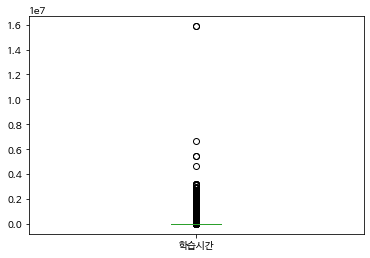

In [65]:
df_IT_Q['학습시간'].plot.box()

In [66]:
drop_index = df_IT_Q[df_IT_Q['학습시간'] > 0.4 * 1e7].index
drop_index

Int64Index([2796, 3028, 3162, 3809, 3984, 3985], dtype='int64')

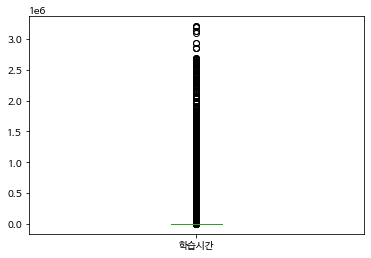

In [67]:
df_IT_Q.drop(drop_index, axis=0, inplace=True)
df_IT_Q['학습시간'].plot.box()

In [68]:
drop_index = df_IT_Q[df_IT_Q['학습시간'] > 2000 ].index
len(drop_index)

4839

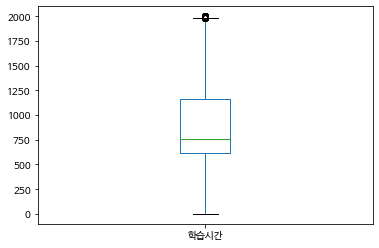

In [69]:
df_IT_Q.drop(drop_index, axis=0, inplace=True)
df_IT_Q['학습시간'].plot.box()

In [70]:
df_IT_Q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16690 entries, 0 to 21534
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       16690 non-null  int64         
 1   교육분야1차      16690 non-null  object        
 2   교육분야2차      16690 non-null  object        
 3   과정코드        16690 non-null  object        
 4   과정명(학습명)    16690 non-null  object        
 5   과정등록일(생성일)  9965 non-null   object        
 6   학습시작일       16690 non-null  datetime64[ns]
 7   학습종료일       16690 non-null  datetime64[ns]
 8   사번(ID)      16690 non-null  object        
 9   소속부서        16690 non-null  object        
 10  호칭          16690 non-null  object        
 11  직무          16690 non-null  object        
 12  제작/소싱       8 non-null      object        
 13  자격증보유여부     16690 non-null  object        
 14  학습지수        16666 non-null  float64       
 15  과정코드비율      16690 non-null  float64       
 16  경력개월수       16690 non-

### 교육분야2차 : 불평균 컬럼 --> 삭제 해야

 it      15716
 연구개발      974
Name: 교육분야2차, dtype: int64


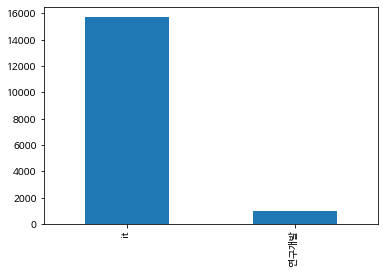

In [71]:
print(df_IT_Q['교육분야2차'].value_counts())
df_IT_Q['교육분야2차'].value_counts().plot.bar()

### 나머지 시각화

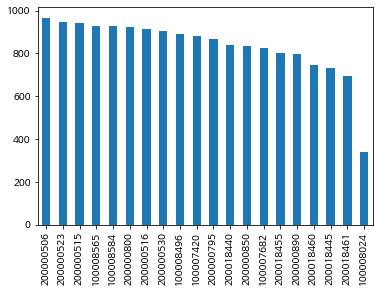

In [72]:
df_IT_Q['과정코드'].value_counts().plot.bar()

대리    4088
사원    4031
과장    3461
차장    2600
부장    1658
임원     852
Name: 호칭, dtype: int64


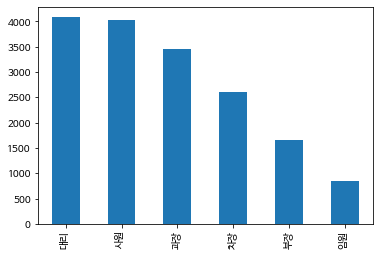

In [73]:
print(df_IT_Q['호칭'].value_counts())
df_IT_Q['호칭'].value_counts().plot.bar()

제조     1945
경영     1894
마케팅    1872
IT     1863
영업     1860
회계     1844
연구     1807
유통     1803
HR     1802
Name: 직무, dtype: int64


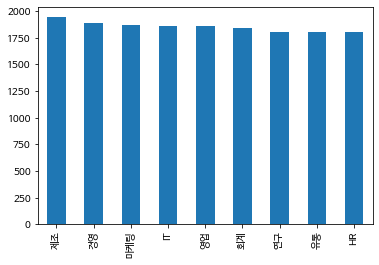

In [74]:
print(df_IT_Q['직무'].value_counts())
df_IT_Q['직무'].value_counts().plot.bar()

N    10901
Y     5789
Name: 자격증보유여부, dtype: int64


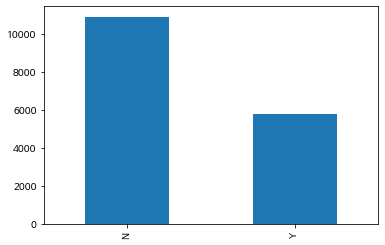

In [75]:
print(df_IT_Q['자격증보유여부'].value_counts())
df_IT_Q['자격증보유여부'].value_counts().plot.bar()

13_to_18    7524
9_to_12     4326
18_to_24    1824
0_to_6      1361
6_to_9      1145
12_to_13     510
Name: 학습시간대, dtype: int64


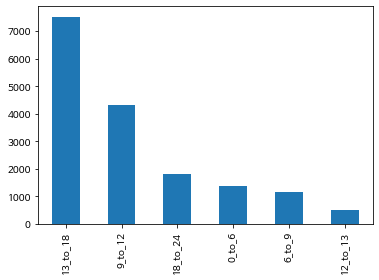

In [76]:
print(df_IT_Q['학습시간대'].value_counts())
df_IT_Q['학습시간대'].value_counts().plot.bar()

1    3287
2    3181
4    3160
3    3065
0    2901
6     566
5     530
Name: 학습요일, dtype: int64


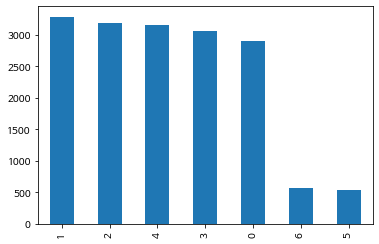

In [77]:
print(df_IT_Q['학습요일'].value_counts())
df_IT_Q['학습요일'].value_counts().plot.bar()

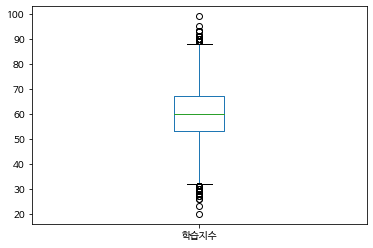

In [78]:
df_IT_Q['학습지수'].plot.box()

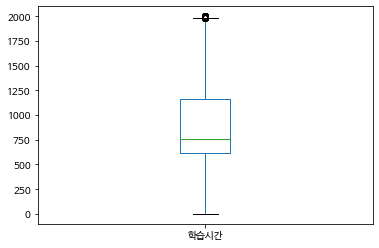

In [79]:
df_IT_Q['학습시간'].plot.box()

### 경력개월수 OUTLIER 삭제

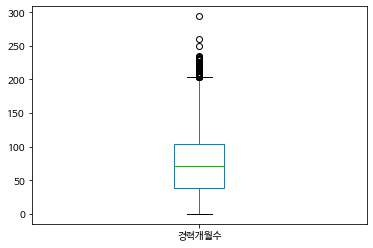

In [80]:
df_IT_Q['경력개월수'].plot.box()

In [81]:
drop_index = df_IT_Q[df_IT_Q['경력개월수'] > 200].index
df_IT_Q.drop(drop_index, axis=0, inplace=True)

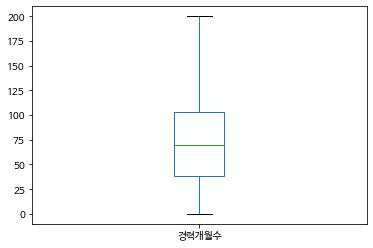

In [82]:
df_IT_Q['경력개월수'].plot.box()

### 어학점수 Outlier 삭제

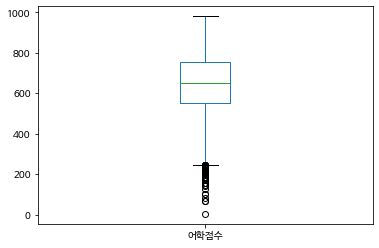

In [83]:
df_IT_Q['어학점수'].plot.box()

In [84]:
drop_index = df_IT_Q[df_IT_Q['어학점수'] < 240].index
df_IT_Q.drop(drop_index, axis=0, inplace=True)

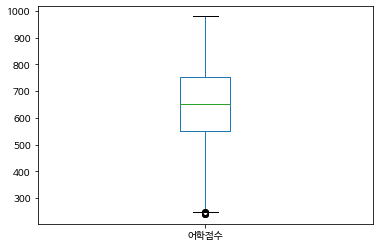

In [85]:
df_IT_Q['어학점수'].plot.box()

### 수강횟수 Outlier 삭제

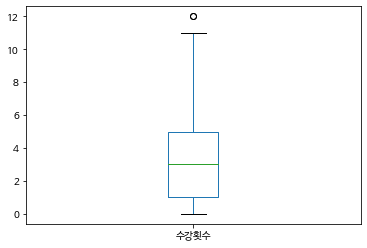

In [86]:
df_IT_Q['수강횟수'].plot.box()

In [87]:
drop_index = df_IT_Q[df_IT_Q['수강횟수'] > 10].index
df_IT_Q.drop(drop_index, axis=0, inplace=True)

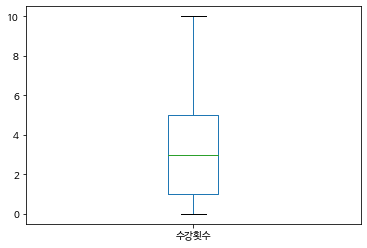

In [88]:
df_IT_Q['수강횟수'].plot.box()

In [89]:
df_IT_Q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16566 entries, 0 to 21534
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       16566 non-null  int64         
 1   교육분야1차      16566 non-null  object        
 2   교육분야2차      16566 non-null  object        
 3   과정코드        16566 non-null  object        
 4   과정명(학습명)    16566 non-null  object        
 5   과정등록일(생성일)  9882 non-null   object        
 6   학습시작일       16566 non-null  datetime64[ns]
 7   학습종료일       16566 non-null  datetime64[ns]
 8   사번(ID)      16566 non-null  object        
 9   소속부서        16566 non-null  object        
 10  호칭          16566 non-null  object        
 11  직무          16566 non-null  object        
 12  제작/소싱       8 non-null      object        
 13  자격증보유여부     16566 non-null  object        
 14  학습지수        16542 non-null  float64       
 15  과정코드비율      16566 non-null  float64       
 16  경력개월수       16566 non-

In [90]:
import seaborn as sns

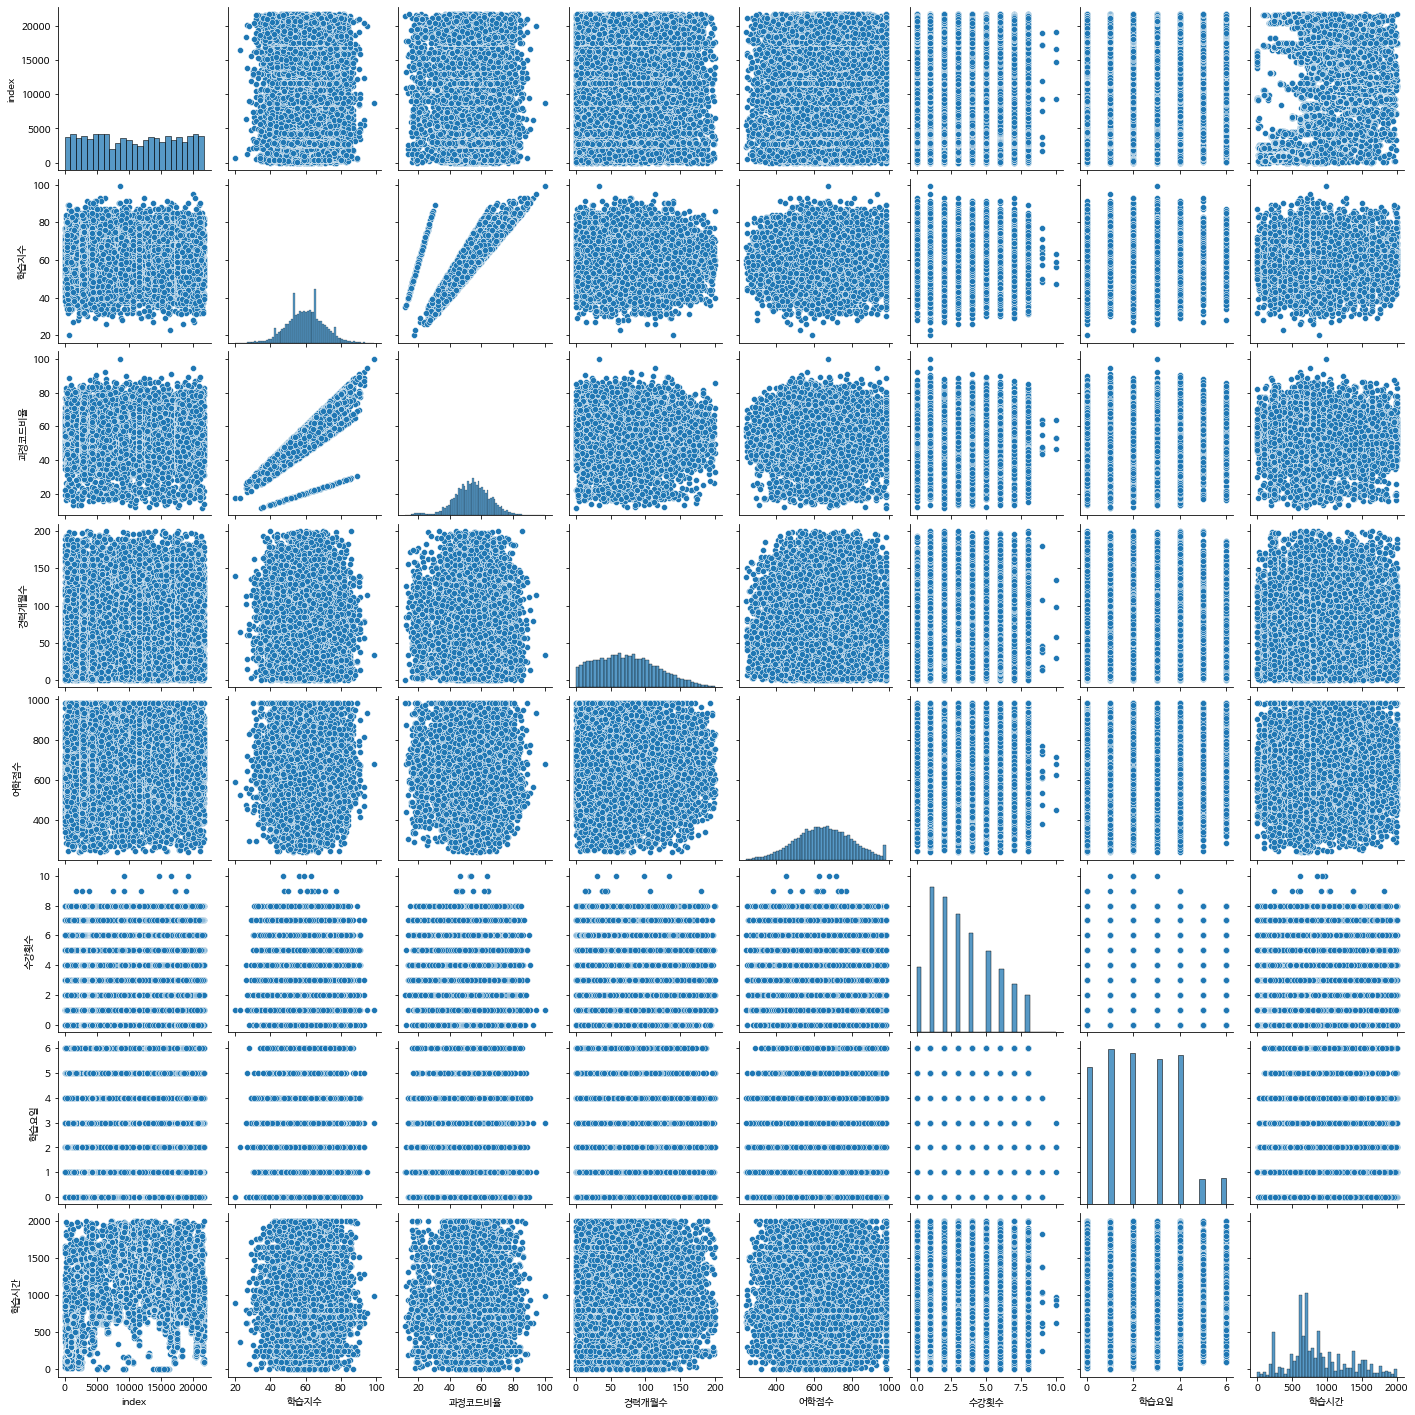

In [91]:
sns.pairplot(df_IT_Q)

### 과정코드:과정명 디셔너리 만들기

In [92]:
# 과정코드:과정명 디셔너리 만들기
과정코드_과정명_디셔너리 = {}
for idx in df_IT_Q.index:
  k = df_IT_Q.loc[idx, '과정코드']
  v = df_IT_Q.loc[idx, '과정명(학습명)']
  과정코드_과정명_디셔너리[k] = v

In [93]:
len(과정코드_과정명_디셔너리)

20

### NULL 처리

In [94]:
df_IT_Q.isnull().sum()

index             0
교육분야1차            0
교육분야2차            0
과정코드              0
과정명(학습명)          0
과정등록일(생성일)     6684
학습시작일             0
학습종료일             0
사번(ID)            0
소속부서              0
호칭                0
직무                0
제작/소싱         16558
자격증보유여부           0
학습지수             24
과정코드비율            0
경력개월수             0
어학점수              0
수강횟수              0
학습시작일_TIME        0
학습종료일_TIME        0
학습시간대             0
학습요일              0
학습요일_CONV         0
학습요일_WEEK         0
학습시간              0
dtype: int64

In [95]:
df_IT_Q['학습지수'] = df_IT_Q['학습지수'].fillna(method='ffill')

In [96]:
df_IT_Q.isnull().sum()

index             0
교육분야1차            0
교육분야2차            0
과정코드              0
과정명(학습명)          0
과정등록일(생성일)     6684
학습시작일             0
학습종료일             0
사번(ID)            0
소속부서              0
호칭                0
직무                0
제작/소싱         16558
자격증보유여부           0
학습지수              0
과정코드비율            0
경력개월수             0
어학점수              0
수강횟수              0
학습시작일_TIME        0
학습종료일_TIME        0
학습시간대             0
학습요일              0
학습요일_CONV         0
학습요일_WEEK         0
학습시간              0
dtype: int64

In [97]:
df_IT_Q.drop(['교육분야1차', '교육분야2차', '과정명(학습명)', '학습시작일', '학습종료일', '사번(ID)', '학습시작일_TIME','학습종료일_TIME' , '과정등록일(생성일)', '제작/소싱'], axis=1, inplace=True)

In [98]:
df_IT_Q.isnull().sum()

index        0
과정코드         0
소속부서         0
호칭           0
직무           0
자격증보유여부      0
학습지수         0
과정코드비율       0
경력개월수        0
어학점수         0
수강횟수         0
학습시간대        0
학습요일         0
학습요일_CONV    0
학습요일_WEEK    0
학습시간         0
dtype: int64

In [99]:
df_IT_Q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16566 entries, 0 to 21534
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      16566 non-null  int64  
 1   과정코드       16566 non-null  object 
 2   소속부서       16566 non-null  object 
 3   호칭         16566 non-null  object 
 4   직무         16566 non-null  object 
 5   자격증보유여부    16566 non-null  object 
 6   학습지수       16566 non-null  float64
 7   과정코드비율     16566 non-null  float64
 8   경력개월수      16566 non-null  float64
 9   어학점수       16566 non-null  float64
 10  수강횟수       16566 non-null  float64
 11  학습시간대      16566 non-null  object 
 12  학습요일       16566 non-null  int64  
 13  학습요일_CONV  16566 non-null  object 
 14  학습요일_WEEK  16566 non-null  object 
 15  학습시간       16566 non-null  float64
dtypes: float64(6), int64(2), object(8)
memory usage: 2.8+ MB


In [100]:
df_IT_Q.loc[ :, '과정코드'].value_counts().count()

20

# Dummy로 만들기



In [101]:
cat_col = ['학습시간대', '소속부서', '호칭', '직무', '자격증보유여부', '학습요일_CONV', '학습요일_WEEK']
df_IT_Q = pd.get_dummies(data=df_IT_Q, columns=cat_col, drop_first=True)

In [102]:
df_IT_Q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16566 entries, 0 to 21534
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              16566 non-null  int64  
 1   과정코드               16566 non-null  object 
 2   학습지수               16566 non-null  float64
 3   과정코드비율             16566 non-null  float64
 4   경력개월수              16566 non-null  float64
 5   어학점수               16566 non-null  float64
 6   수강횟수               16566 non-null  float64
 7   학습요일               16566 non-null  int64  
 8   학습시간               16566 non-null  float64
 9   학습시간대_12_to_13     16566 non-null  uint8  
 10  학습시간대_13_to_18     16566 non-null  uint8  
 11  학습시간대_18_to_24     16566 non-null  uint8  
 12  학습시간대_6_to_9       16566 non-null  uint8  
 13  학습시간대_9_to_12      16566 non-null  uint8  
 14  소속부서_강북            16566 non-null  uint8  
 15  소속부서_강원            16566 non-null  uint8  
 16  소속부서_기타            165

In [103]:
len(df_IT_Q['과정코드'].unique())

20

# X, y 분리

In [104]:
X = df_IT_Q.drop('과정코드', axis=1).values
y = df_IT_Q['과정코드'].values

In [105]:
X.shape, y.shape

((16566, 41), (16566,))

In [106]:
y[:4]

array(['200000890', '100008024', '200000850', '200000800'], dtype=object)

# 라벨 인코딩/원핫 인코딩

In [107]:
from sklearn.preprocessing import LabelEncoder
#from tensorflow.keras.utils import to_categorical

In [108]:
le = LabelEncoder()
y = le.fit_transform(y)

In [109]:
print(y[:3])
print(le.classes_)

[14  2 13]
['100007420' '100007682' '100008024' '100008496' '100008565' '100008584'
 '200000506' '200000515' '200000516' '200000523' '200000530' '200000795'
 '200000800' '200000850' '200000890' '200018440' '200018445' '200018455'
 '200018460' '200018461']


In [110]:
#y_ohe = to_categorical(y)

In [111]:
#print(y_ohe[:3])

# Train/Test 데이터셋 나누기

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
#X_train, X_test, y_train, y_test = train_test_split(X, y_ohe, test_size=0.3, stratify=y, random_state=41)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=41)

In [114]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11596, 41), (4970, 41), (11596,), (4970,))

# 스케일링

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [117]:
X_train[0]

array([-0.01506712, -0.20881462, -0.1200644 , -0.40256208, -0.88873638,
       -1.45985347,  1.08325617,  0.37421753, -0.17950935, -0.90135531,
       -0.35038985, -0.26817378,  1.68402036, -0.41547086, -0.01608654,
        1.24171961, -0.29631888, -0.2402908 , -0.30653265, -0.32697253,
       -0.56938369, -0.33195823,  1.76080218, -0.23028907, -0.42527097,
       -0.35625741, -0.35947723, -0.35579613, -0.34649938, -0.34992428,
       -0.34649938, -0.36813969, -0.35162965, -0.72649827, -0.47108153,
       -0.48930415, -0.46244948, -0.19193317, -0.17925326, -0.49119849,
       -0.26724889])

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
rf = RandomForestClassifier(n_estimators=500, random_state=41)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.24647887323943662

In [120]:
y_pred = rf.predict(X_test)

In [121]:
y_pred[:3]

array([ 8, 10,  0])

In [122]:
from sklearn.metrics import classification_report

In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.21      0.20      0.21       264
           1       0.17      0.18      0.18       245
           2       0.93      0.99      0.96       101
           3       0.12      0.11      0.12       265
           4       0.16      0.17      0.16       276
           5       0.15      0.14      0.15       277
           6       0.31      0.41      0.35       287
           7       0.16      0.18      0.17       281
           8       0.18      0.16      0.17       272
           9       0.14      0.16      0.15       282
          10       0.24      0.20      0.22       269
          11       0.19      0.16      0.17       258
          12       0.24      0.19      0.21       274
          13       0.21      0.17      0.19       248
          14       0.29      0.26      0.27       237
          15       0.19      0.18      0.19       250
          16       0.31      0.31      0.31       217
          17       0.36    

# IT 분야 과정명 20개중에서 추천 3개 모델링 만들기

In [124]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#from tensorflow.keras.utils import to_categorical

In [125]:
tf.random.set_seed(41)

EPOCHS = 100
BATCH_SIZE = 32
SAMPLE_COUNT = 20

In [126]:
model = Sequential()

In [127]:
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(SAMPLE_COUNT, activation='softmax'))

In [128]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2688      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                660       
                                                                 
Total params: 6,484
Trainable params: 6,484
Non-trainabl

In [129]:
mc = ModelCheckpoint('best_model.ht5', monitor='val_loss', save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [130]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [131]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), callbacks=[mc, es])

Epoch 1/100
363/363 [==============================] - 4s 8ms/step - loss: 3.0122 - accuracy: 0.0557 - val_loss: 2.9816 - val_accuracy: 0.0598
Epoch 2/100
363/363 [==============================] - 2s 6ms/step - loss: 2.9651 - accuracy: 0.0624 - val_loss: 2.9103 - val_accuracy: 0.0592
Epoch 3/100
363/363 [==============================] - 2s 6ms/step - loss: 2.7551 - accuracy: 0.0941 - val_loss: 2.3669 - val_accuracy: 0.1728
Epoch 4/100
363/363 [==============================] - 2s 6ms/step - loss: 2.3262 - accuracy: 0.1604 - val_loss: 1.9346 - val_accuracy: 0.3004
Epoch 5/100
363/363 [==============================] - 2s 6ms/step - loss: 2.0123 - accuracy: 0.2151 - val_loss: 1.6678 - val_accuracy: 0.3966
Epoch 6/100
363/363 [==============================] - 2s 6ms/step - loss: 1.8081 - accuracy: 0.2666 - val_loss: 1.5285 - val_accuracy: 0.4837
Epoch 7/100
363/363 [==============================] - 2s 6ms/step - loss: 1.6809 - accuracy: 0.2974 - val_loss: 1.4209 - val_accuracy: 0.4922

In [132]:
pred = model.predict(X_test[:20])

In [133]:
print(pred.shape)

(20, 20)


In [134]:
# 3개 추천
top3 = np.argsort(-1 * pred, axis=1)[:, :3]
top3

array([[15, 13,  1],
       [12, 10,  8],
       [15, 13,  1],
       [11,  0, 15],
       [16, 18, 17],
       [ 4,  9,  5],
       [ 9,  5,  3],
       [16, 18, 17],
       [10, 12,  8],
       [ 4,  9,  5],
       [ 0, 11, 12],
       [ 8, 10, 12],
       [ 3,  7,  9],
       [ 9,  5,  4],
       [ 6,  3,  7],
       [ 1, 13, 14],
       [15, 13,  1],
       [ 3,  7,  5],
       [ 4,  9,  5],
       [ 0, 11, 12]])

In [135]:
고객별_추천리스트 = []
for num3 in top3:
  for idx in num3:
    code = le.classes_[idx]
    #print(code, type(code))
    추천과정명 = 과정코드_TO_과정명.get(code)
    고객별_추천리스트.append(추천과정명)
  print(고객별_추천리스트)
  고객별_추천리스트.clear()

['[클라우드 ] 클라우드 이해 1-1 클라우드 중요성', 'K에듀 시큐어코딩 가이드(사례심화)', 'RPA 시작하기']
['K에듀 시큐어코딩 가이드(12)', '[인프라] 클라우드 개요', '1 전환 가입자 예측 모델 만들기']
['[클라우드 ] 클라우드 이해 1-1 클라우드 중요성', 'K에듀 시큐어코딩 가이드(사례심화)', 'RPA 시작하기']
['K에듀 시큐어코딩 가이드(22)', '개발 보안 가이드 (2편)', '[클라우드 ] 클라우드 이해 1-1 클라우드 중요성']
['[클라우드 ] 클라우드 이해 1-2 클라우드 제공방식', '[클라우드 ] K에듀 클라우드2-1 K에듀 클라우드 선택의 이유', '[클라우드 ] 클라우드 이해 1-3 클라우드 사용이유']
['개발 보안 가이드 (1편 개요보안은 왜 필요한가요)', 'K에듀 스마트팩토리 경쟁력', '웹스크래핑하기']
['K에듀 스마트팩토리 경쟁력', '웹스크래핑하기', '쉬운우리보안1 피싱메일 예방법']
['[클라우드 ] 클라우드 이해 1-2 클라우드 제공방식', '[클라우드 ] K에듀 클라우드2-1 K에듀 클라우드 선택의 이유', '[클라우드 ] 클라우드 이해 1-3 클라우드 사용이유']
['[인프라] 클라우드 개요', 'K에듀 시큐어코딩 가이드(12)', '1 전환 가입자 예측 모델 만들기']
['개발 보안 가이드 (1편 개요보안은 왜 필요한가요)', 'K에듀 스마트팩토리 경쟁력', '웹스크래핑하기']
['개발 보안 가이드 (2편)', 'K에듀 시큐어코딩 가이드(22)', 'K에듀 시큐어코딩 가이드(12)']
['1 전환 가입자 예측 모델 만들기', '[인프라] 클라우드 개요', 'K에듀 시큐어코딩 가이드(12)']
['쉬운우리보안1 피싱메일 예방법', '1 텍스트 감정 분석하기', 'K에듀 스마트팩토리 경쟁력']
['K에듀 스마트팩토리 경쟁력', '웹스크래핑하기', '개발 보안 가이드 (1편 개요보안은 왜 필요한가요)']
['1 AI 분석 시작하기', '쉬운우리보안1 피싱메일 예방법', '1 텍스트 